Single-variable linear regression using Tensorflow 

Using the immigrant skills and salaries dataset sourced from the UFL website.

Description - http://users.stat.ufl.edu/~winner/data/immwork.txt

Data - http://users.stat.ufl.edu/~winner/data/immwork.dat

The dataset is manually split into a training set and a test set. 

The feature used (X) is '% speak English' (column 3) and the output (Y) is average weekly salary (column 2)

Inspired by the code in https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

In [117]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [118]:
learning_rate = 0.0025 # TODO: figure out role of learning rate and how it affects convergence
num_epochs = 18000
progress_step = 1000

In [119]:
# Training set
# percent that speak English 
engper_train = np.asarray([54.9,66.0,20.3,79.4,100.0,50.9,96.5,86.1,100.0,50.3,45.6,68.6,87.5,33.5,74.7,79.5,100.0,58.8,48.7,51.3,21.1,46.4,96.9,43.5,45.2])

# average weekly salary
sal_train = np.asarray([9.73,13.07,10.31,10.62,14.15,11.37,14.32,12.04,14.13,13.27,11.07,12.92,13.63,8.41,12.71,14.37,13.01,11.28,9.61,11.03,8.95,11.65,15.28,11.06,8.10])

num_training_samples = engper_train.shape[0]

# Test set
engper_test = np.asarray([33.3,43.6,36.8,100.0,41.2,55.6,51.7,94.7,54.6,22.5])
sal_test = np.asarray([10.90,11.01,9.92,15.24,10.75,11.95,12.15,15.36,8.12,7.65])

num_test_samples = engper_test.shape[0]

In [120]:
# create placeholders for X and Y - this allows input data to be fed in.
X = tf.placeholder("float")
Y = tf.placeholder("float")

# create variables for weight and bias - these are trainable by default and change during the training.
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [121]:
# the predicted value is W.x + b
pred = tf.add(tf.multiply(W, X), b)

In [122]:
# estimate the cost - mean-squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_training_samples)

In [123]:
# use a Gradient descent optimizer that minimizes the cost.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [124]:
# define the init operation
init = tf.global_variables_initializer()

epoch: 0, cost: 5.099938, W: 0.185407, b: -0.473539
epoch: 1000, cost: 3.003444, W: 0.151733, b: 1.779677
epoch: 2000, cost: 1.905711, W: 0.127362, b: 3.410412
epoch: 3000, cost: 1.331014, W: 0.109724, b: 4.590634
epoch: 4000, cost: 1.030199, W: 0.096959, b: 5.444812
epoch: 5000, cost: 0.872788, W: 0.087720, b: 6.063004
epoch: 6000, cost: 0.790450, W: 0.081034, b: 6.510389
epoch: 7000, cost: 0.747387, W: 0.076193, b: 6.834304
epoch: 8000, cost: 0.724908, W: 0.072692, b: 7.068530
epoch: 9000, cost: 0.713163, W: 0.070157, b: 7.238210
epoch: 10000, cost: 0.707041, W: 0.068321, b: 7.361061
epoch: 11000, cost: 0.703861, W: 0.066994, b: 7.449854
epoch: 12000, cost: 0.702214, W: 0.066036, b: 7.513961
epoch: 13000, cost: 0.701359, W: 0.065340, b: 7.560522
epoch: 14000, cost: 0.700923, W: 0.064840, b: 7.593941
epoch: 15000, cost: 0.700698, W: 0.064476, b: 7.618327
epoch: 16000, cost: 0.700584, W: 0.064211, b: 7.636057
epoch: 17000, cost: 0.700527, W: 0.064019, b: 7.648896
Training complete: c=0

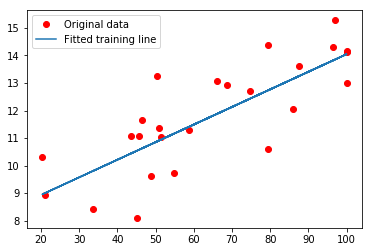

test cost=0.957344
cost diff=0.256845


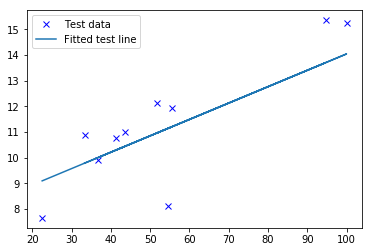

In [125]:
# start up a session and run the operations
with tf.Session() as sess:
    sess.run(init)
    
    # in this case, epoch is basically same as the step since batch size is 1.
    for epoch in range(num_epochs):
        for (x, y) in zip(engper_train, sal_train):
            sess.run(optimizer, feed_dict={X: x, Y:y})

        # Output progress
        if epoch%progress_step == 0:
            c = sess.run(cost, feed_dict={X: engper_train, Y: sal_train})
            print('epoch: %d, cost: %f, W: %f, b: %f' % (epoch, c, sess.run(W), sess.run(b)))
    
    training_cost = sess.run(cost, feed_dict={X: engper_train, Y: sal_train})
    print 'Training complete: c=%f' % training_cost
    
    # Plot the trained data
    plt.plot(engper_train, sal_train, 'ro', label='Original data')
    plt.plot(engper_train, sess.run(W) * engper_train + sess.run(b), label='Fitted training line')
    plt.legend()
    plt.show()
    
    tcost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_test_samples)
    test_cost = sess.run(tcost, feed_dict={X: engper_test, Y: sal_test})
    print('test cost=%f' % test_cost)
    print('cost diff=%f' % abs(test_cost - training_cost))
    
    # Plot the test data
    plt.plot(engper_test, sal_test, 'bx', label='Test data')
    plt.plot(engper_test, sess.run(W) * engper_test + sess.run(b), label='Fitted test line')
    plt.legend()
    plt.show()